# Worldometers Covid cases (India)
*Display 'TotalCases', ' Deaths', 'Recovered' due to Covid in India*

In [33]:
# Importing required libraries
from bs4 import BeautifulSoup
import requests
import warnings
warnings.filterwarnings('ignore')

In [34]:
# Assigning the URL with variable name 'url'
url = requests.get('https://www.worldometers.info/coronavirus/country/india/')
url

<Response [200]>

<bound method Tag.prettify of <!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en"><!--<![endif]--><head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>India COVID - Coronavirus Statistics - Worldometer</title>
<meta content="India Coronavirus update with statistics and graphs: total and new cases, deaths per day, mortality and recovery rates, current active cases, recoveries, trends and timeline." name="description"/>

<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76x
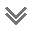

In [35]:
soup = BeautifulSoup(url.content, 'html5lib')
soup.prettify # To comprehensibly display HTML page content 

In [36]:
title = soup.title
title.text # Page title

'India COVID - Coronavirus Statistics - Worldometer'

In [37]:
# choosing the pertinent HTML tag for data parsing
cases = soup.find_all('div' ,class_= 'maincounter-number')
# accessing data using for loop
data = []
for i in cases:
    span = i.find('span')
    data.append(span.string)
    
print(data)

['43,028,131 ', '521,374', '42,493,773']


In [38]:
# Converting the data into dataframe
import pandas as pd
df = pd.DataFrame({"CoronaData": data})
df.index = ['TotalCases', ' Deaths', 'Recovered'] # assigning index names
df

,CoronaData
TotalCases,"43,028,131"
Deaths,"521,374"
Recovered,"42,493,773"


In [39]:
# To convert Data into CSV file format
# df.to_csv('Corona_Data.csv')